In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv(r"E:\conda_workdir\hacks\loan prediction\train_ctrUa4K.csv")
test_df  = pd.read_csv(r"E:\conda_workdir\hacks\loan prediction\test_lAUu6dG.csv")

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [5]:
print(train_df.Loan_Status.value_counts())

Y    422
N    192
Name: Loan_Status, dtype: int64


In [6]:
train_df.isnull().sum() / train_df.shape[0] * 100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [7]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


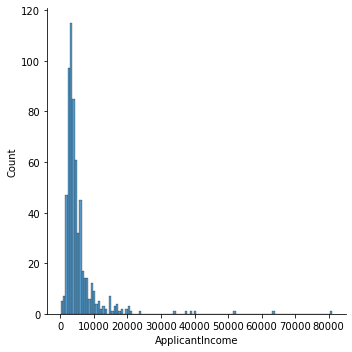

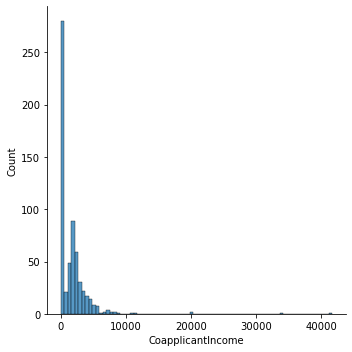

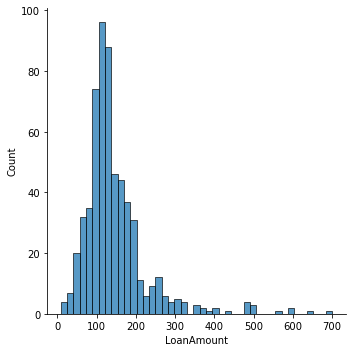

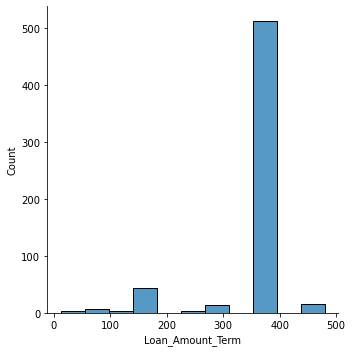

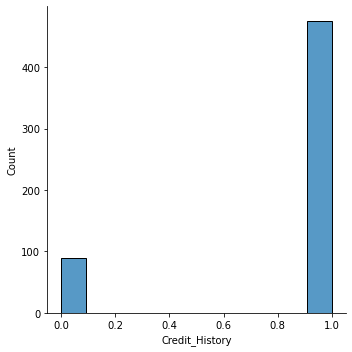

In [8]:
for i in train_df.columns:
    if train_df[i].dtype == "int64" or train_df[i].dtype == "float64" :
        sns.displot(train_df[i])

<AxesSubplot:xlabel='Married', ylabel='Credit_History'>

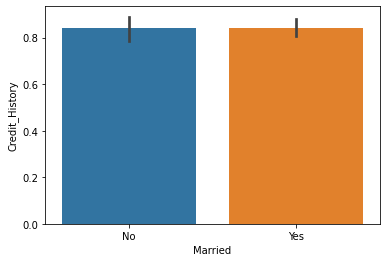

In [9]:
sns.barplot(data=train_df, x="Married", y="Credit_History")

###################################################################################################################

In [10]:
train_df1 = train_df.copy(deep=True)

In [11]:
test_df1 = test_df.copy(deep=True)

In [12]:
train_df1["Credit_History"].mode()

0    1.0
dtype: float64

In [13]:
# impute null

gender_impute = train_df1["Gender"].mode()[0]
married_impute = train_df1["Married"].mode()[0]
dependents_impute = train_df1["Dependents"].mode()[0]
self_employed_impute = train_df1["Self_Employed"].mode()[0]
loan_amount_impute = train_df1["LoanAmount"].median()
loan_term_impute = train_df1["Loan_Amount_Term"].median()
credit_history_impute = train_df1["Credit_History"].mode()[0]

def impute_null(df, gender_impute, married_impute, dependents_impute, self_employed_impute, loan_amount_impute, loan_term_impute, credit_history_impute):
    df["Gender"] = df["Gender"].fillna(value=gender_impute)
    df["Married"] = df["Married"].fillna(value=married_impute)
    df["Dependents"] = df["Dependents"].fillna(value=dependents_impute)
    df["Self_Employed"] = df["Self_Employed"].fillna(value=self_employed_impute)
    df["LoanAmount"] = df["LoanAmount"].fillna(value=loan_amount_impute)
    df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(value=loan_term_impute)
    df["Credit_History"] = df["Credit_History"].fillna(value=credit_history_impute)
    
    return df
    
train_df1 = impute_null(train_df1, gender_impute, married_impute, dependents_impute, self_employed_impute, loan_amount_impute, loan_term_impute, credit_history_impute)         


In [14]:
test_df1 = impute_null(test_df1, gender_impute, married_impute, dependents_impute, self_employed_impute, loan_amount_impute, loan_term_impute, credit_history_impute)                                       

In [15]:
train_df1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
def encode_bi_cat(df, cols):
    for col in cols:
        temp = df[col].unique()[0]
        df[col] = df[col].apply(lambda x: 1 if x==temp else 0)
    return df

In [17]:
bicat_cols = ["Gender", "Married", "Education", "Self_Employed"]

train_df1 = encode_bi_cat(train_df1, bicat_cols)

In [18]:
test_df1 = encode_bi_cat(test_df1, bicat_cols)

In [19]:
train_df1.Loan_Status = train_df1.Loan_Status.apply(lambda x: 1 if x=="Y" else 0)

In [20]:
train_df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,1,0,1,1,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,1,0,1,1,1,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1,0,0,1,0,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,1,0,0,0,1,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,1,1,0,1,1,6000,0.0,141.0,360.0,1.0,Urban,1


In [55]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import PowerTransformer, Normalizer, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, make_scorer, classification_report, plot_confusion_matrix

In [22]:
# train_test_split

X = train_df1.drop(columns=["Loan_ID", "Loan_Status"])
y = train_df1["Loan_Status"]

In [23]:
# one hot encoding for X

X_enc = pd.get_dummies(X)

In [24]:
X_train, X_valid, y_train, y_valid = train_test_split(X_enc, y, test_size=0.20, random_state=42)

In [57]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 83 to 102
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   491 non-null    int64  
 1   Married                  491 non-null    int64  
 2   Education                491 non-null    int64  
 3   Self_Employed            491 non-null    int64  
 4   ApplicantIncome          491 non-null    float64
 5   CoapplicantIncome        491 non-null    float64
 6   LoanAmount               491 non-null    float64
 7   Loan_Amount_Term         491 non-null    float64
 8   Credit_History           491 non-null    float64
 9   Dependents_0             491 non-null    uint8  
 10  Dependents_1             491 non-null    uint8  
 11  Dependents_2             491 non-null    uint8  
 12  Dependents_3+            491 non-null    uint8  
 13  Property_Area_Rural      491 non-null    uint8  
 14  Property_Area_Semiurban  

In [25]:
power = PowerTransformer(method='yeo-johnson', standardize=True)

In [26]:
for col in ["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]:
    
    data = X_train["ApplicantIncome"].to_numpy()
    X_train[col] = power.fit_transform(data.reshape(-1,1))
    
    data = X_valid["ApplicantIncome"].to_numpy()
    X_valid[col] = power.transform(data.reshape(-1,1))

<ipython-input-26-423727091a11>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = power.fit_transform(data.reshape(-1,1))
<ipython-input-26-423727091a11>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid[col] = power.transform(data.reshape(-1,1))
<ipython-input-26-423727091a11>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [58]:
# normalize data
min_x = min(X_train["Loan_Amount_Term"])
max_x = max(X_train["Loan_Amount_Term"])


X_train["Loan_Amount_Term"] = X_train["Loan_Amount_Term"].apply(lambda x:(x-min_x)/(max_x-min_x))
X_valid["Loan_Amount_Term"] = X_valid["Loan_Amount_Term"].apply(lambda x:(x-min_x)/(max_x-min_x))

<ipython-input-58-320e53704b57>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["Loan_Amount_Term"] = X_train["Loan_Amount_Term"].apply(lambda x:(x-min_x)/(max_x-min_x))
<ipython-input-58-320e53704b57>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid["Loan_Amount_Term"] = X_valid["Loan_Amount_Term"].apply(lambda x:(x-min_x)/(max_x-min_x))


################################################################################################################

In [28]:
# logistic rgression

logreg = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

grid = dict(solver=solvers,C=c_values)




In [29]:
cv = StratifiedKFold(n_splits=5)
grid_search = GridSearchCV(estimator=logreg, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
grid_search_log_reg = grid_search.fit(X_train, y_train)

In [30]:
best_log_reg = grid_search_log_reg.best_estimator_

In [31]:
best_log_reg.fit(X_train, y_train)
y_pred = best_log_reg.predict(X_valid)

In [32]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



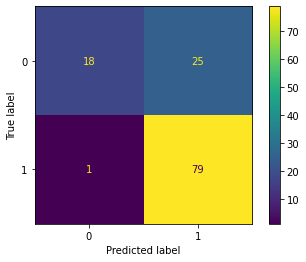

In [33]:
print(plot_confusion_matrix(best_log_reg, X_valid, y_valid))

################################################################################################################

In [34]:
from sklearn.naive_bayes import GaussianNB

In [35]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

In [36]:
nb_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=cv, n_jobs=-1, scoring='accuracy')
grid_search_nb = nb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [37]:
best_nb = grid_search_nb.best_estimator_

best_nb.fit(X_train, y_train)
y_pred = best_nb.predict(X_valid)

              precision    recall  f1-score   support

           0       0.86      0.44      0.58        43
           1       0.76      0.96      0.85        80

    accuracy                           0.78       123
   macro avg       0.81      0.70      0.72       123
weighted avg       0.80      0.78      0.76       123



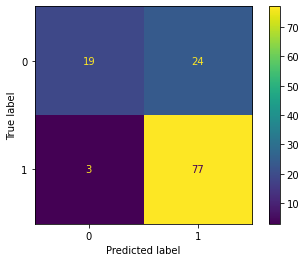

In [38]:
print(classification_report(y_valid, y_pred))
print(plot_confusion_matrix(best_nb, X_valid, y_valid))

#####################################################################################################################

In [39]:
from sklearn import svm

In [40]:
svc = svm.SVC()

In [41]:
gammas = [0.1, 1, 10, 100]
cs = [0.1, 1, 10, 100, 1000]
kernel=['rbf', "linear"]

param_grid_svm = {"gamma":gammas, "C":cs, "kernel": kernel}

In [42]:
svc_grid = GridSearchCV(estimator=svc, param_grid=param_grid_svm, verbose=1, cv=StratifiedKFold(n_splits=5), n_jobs=-1, scoring='accuracy')
grid_search_svc = svc_grid.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


In [43]:
best_svc = grid_search_svc.best_estimator_

best_svc.fit(X_train, y_train)
y_pred = best_svc.predict(X_valid)

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



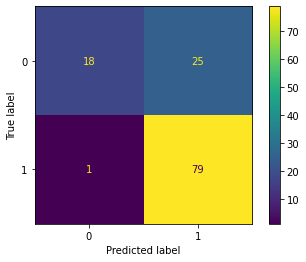

In [44]:
print(classification_report(y_valid, y_pred))
print(plot_confusion_matrix(best_svc, X_valid, y_valid))

In [45]:
best_svc

SVC(C=0.1, gamma=0.1, kernel='linear')

In [46]:
# predictions

X_test = test_df1.drop(columns=["Loan_ID"])

In [47]:
X_test = pd.get_dummies(X_test)

In [48]:
for col in ["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]:

    data = X_test["ApplicantIncome"].to_numpy()
    X_test[col] = power.transform(data.reshape(-1,1))
    
X_test["Loan_Amount_Term"] = X_test["Loan_Amount_Term"].apply(lambda x:(x-min_x)/(max_x-min_x))

In [49]:
y_test_pred = best_svc.predict(X_test)

In [50]:
y_test_pred_series = pd.Series(y_test_pred)

id_pred_dict = {"Loan_ID":test_df1.Loan_ID, "Loan_Status": y_test_pred_series}

In [91]:
output_df = pd.DataFrame(id_pred_dict)
output_df.Loan_Status = output_df.Loan_Status.apply(lambda x: 'Y' if x == 1 else 'N')

In [92]:
output_df.to_csv("E:\conda_workdir\hacks\loan prediction\loan_prediction.csv")

#####################################################################################################################

In [103]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsTransformer
from sklearn.pipeline import Pipeline
from tempfile import TemporaryDirectory
import matplotlib.pyplot as plt

In [104]:
n_neighbors_list = [5, 7, 9, 11, 13, 15, 17]

In [105]:
graph_model = KNeighborsTransformer(n_neighbors=max(n_neighbors_list),
                                    mode='distance')
classifier_model = KNeighborsClassifier(metric='precomputed')

In [106]:
with TemporaryDirectory(prefix="sklearn_graph_cache_") as tmpdir:
    full_model = Pipeline(
        steps=[('graph', graph_model), ('classifier', classifier_model)],
        memory=tmpdir)

    param_grid = {'classifier__n_neighbors': n_neighbors_list}
    grid_model = GridSearchCV(full_model, param_grid)
    grid_model.fit(X_train, y_train)

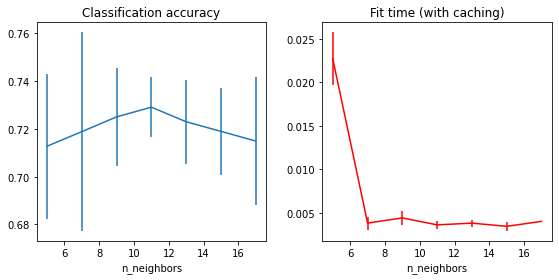

In [107]:
# Plot the results of the grid search.
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].errorbar(x=n_neighbors_list,
                 y=grid_model.cv_results_['mean_test_score'],
                 yerr=grid_model.cv_results_['std_test_score'])
axes[0].set(xlabel='n_neighbors', title='Classification accuracy')
axes[1].errorbar(x=n_neighbors_list, y=grid_model.cv_results_['mean_fit_time'],
                 yerr=grid_model.cv_results_['std_fit_time'], color='r')
axes[1].set(xlabel='n_neighbors', title='Fit time (with caching)')
fig.tight_layout()
plt.show()

In [108]:
best_knn = grid_model.best_estimator_
y_pred = best_knn.predict(X_valid)

              precision    recall  f1-score   support

           0       1.00      0.23      0.38        43
           1       0.71      1.00      0.83        80

    accuracy                           0.73       123
   macro avg       0.85      0.62      0.60       123
weighted avg       0.81      0.73      0.67       123



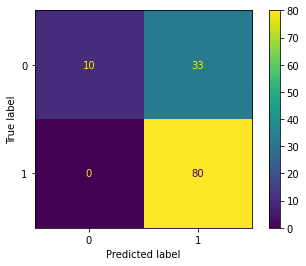

In [109]:
print(classification_report(y_valid, y_pred))
print(plot_confusion_matrix(best_knn, X_valid, y_valid))

#######################################################################################################################

In [88]:
from sklearn.ensemble import RandomForestClassifier


In [137]:
rfc=RandomForestClassifier(random_state=42, class_weight={1:1, 0:10})

In [138]:
param_grid = { 
    'n_estimators': [50, 75, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,6,8,10]}



CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= cv)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(class_weight={0: 10, 1: 1},
                                              random_state=42),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 75, 100]})

In [139]:
best_rfc = CV_rfc.best_estimator_

y_pred = best_rfc.predict(X_valid)

In [142]:
best_rfc

RandomForestClassifier(class_weight={0: 10, 1: 1}, max_depth=10,
                       n_estimators=75, random_state=42)

              precision    recall  f1-score   support

           0       0.67      0.60      0.63        43
           1       0.80      0.84      0.82        80

    accuracy                           0.76       123
   macro avg       0.73      0.72      0.73       123
weighted avg       0.75      0.76      0.75       123



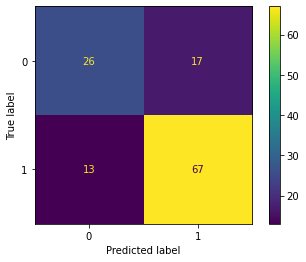

In [140]:
print(classification_report(y_valid, y_pred))
print(plot_confusion_matrix(best_rfc, X_valid, y_valid))

In [141]:
# predictions

y_test_pred = best_svc.predict(X_test)

y_test_pred_series = pd.Series(y_test_pred)

id_pred_dict = {"Loan_ID":test_df1.Loan_ID, "Loan_Status": y_test_pred_series}

output_df = pd.DataFrame(id_pred_dict)
output_df.Loan_Status = output_df.Loan_Status.apply(lambda x: 'Y' if x == 1 else 'N')

output_df.to_csv("E:\conda_workdir\hacks\loan prediction\loan_prediction_rfc.csv")